# Feedback Loops in Adaptive Learning Systems

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib  inline
from collections import OrderedDict, namedtuple
from math import sqrt, log
from random import random, randint, choice
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from models import create_proxy_student, create_true_student
from models import LearningSystem
from models import proxy_objective_solved_tasks
from models import proxy_objective_successful_tasks
from models import proxy_objective_target_skill
from models import proxy_objective_effective_tasks
from simulation import simulate_student, simulate_system
from evaluation import evaluate_system
from plotting import plot_student, plot_system

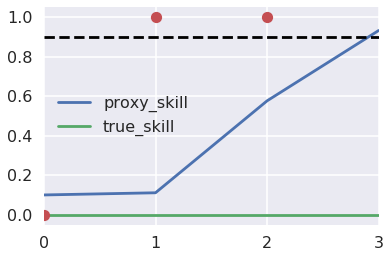

In [3]:
plot_student(simulate_student(i_student=0))

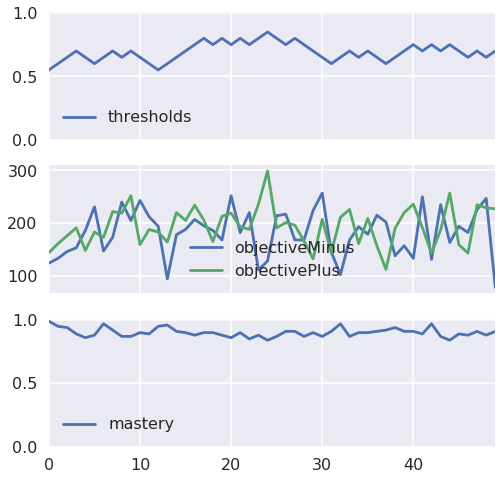

In [4]:
results = simulate_system(
    n_students=100,
    proxy_objective=proxy_objective_effective_tasks)
plot_system(results)

In [5]:
evaluate_system(
    n_iters_system=100,
    n_students=10,
    proxy_objective=proxy_objective_effective_tasks)

0.0

In [ ]:
evaluate_system(proxy_objective=proxy_objective_solved_tasks)

In [6]:
evaluate_system(proxy_objective=proxy_objective_successful_tasks)

0.94

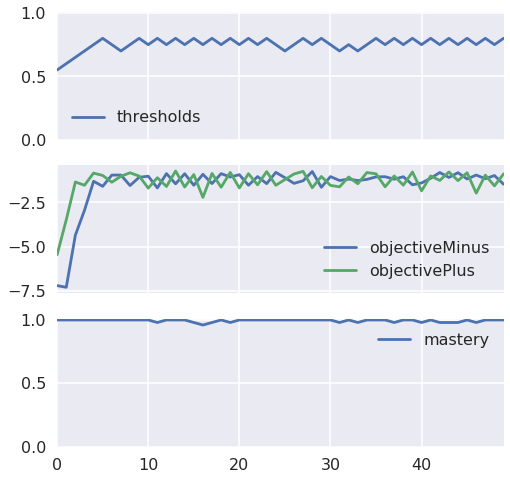

In [7]:
target_85 = lambda s: proxy_objective_target_skill(s, 0.85)
results = simulate_system(proxy_objective=target_85)
plot_system(results)

In [29]:
evaluate_system(
    n_iters_system=50,
    n_students=20,
    noise=0.2,
    proxy_objective=proxy_objective_effective_tasks)

0.08333333333333333

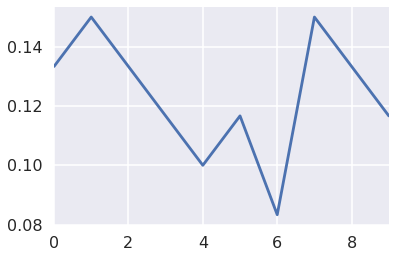

In [36]:
noises = np.linspace(0, 0.25, 10)
results = [
    evaluate_system(
        n_iters_system=50,
        n_students=20,
        noise=0.2,
        proxy_objective=proxy_objective_effective_tasks)
    for noise in noises]
df = pd.DataFrame({'noise': noises, 'result': results})
df.result.plot()

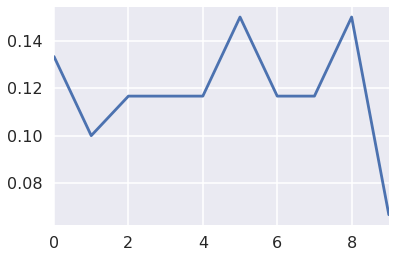

In [33]:
df = pd.DataFrame({'noise': noises, 'result': results})
df.result.plot()